# Receiver
----

In [2]:
# imported libraries
import cv2 as cv
import matplotlib.pyplot as plt
from lib.conversion import *
from lib.encrypt import *
from lib.PRBG import *

In [3]:
# seed parameters for decryption
key = {
    'diffusion_range' : 5,
    'x0' : .5,
    'y0' : .7
}

In [5]:
# read an image file
received_img = cv.imread('cipherImage.tiff', cv.IMREAD_GRAYSCALE)
print("Image document type is: {}".format(received_img.dtype))
height = received_img.shape[0]
width = received_img.shape[1]

Image document type is: uint8


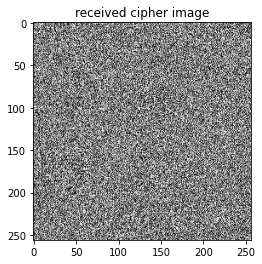

In [6]:
# plot image
plt.title('received cipher image')
plt.imshow(received_img, cmap='gray')

In [7]:
# obtaining bitplanes
encp = Encryption()
bitplane_images = encp.bitplane_decomposition(received_img, height, width)
titles = ['bitplane8',
          'bitplane7',
          'bitplane6',
          'bitplane5',
          'bitplane4',
          'bitplane3',
          'bitplane2',
          'bitplane1']

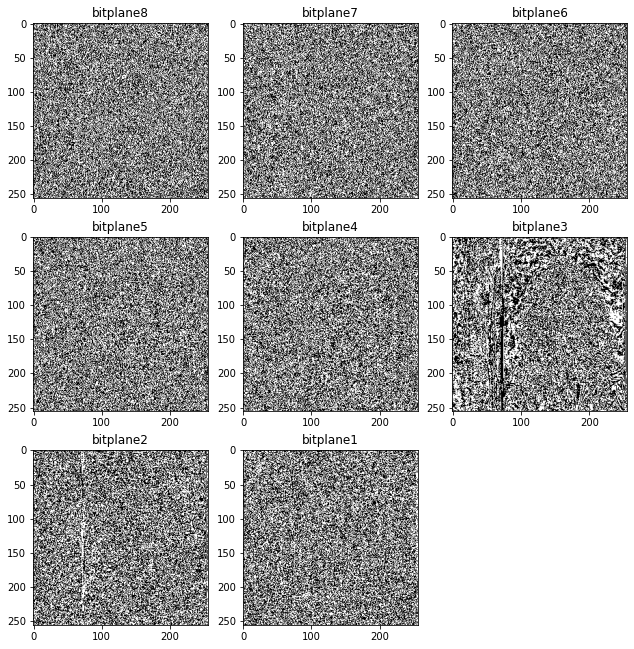

In [8]:
# viewing bitplane images
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.title(titles[i])
    plt.imshow(convert_to_255(bitplane_images[i]), cmap='gray', vmin=0, vmax=255)

plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2)

In [14]:
# CCCBG
cccbg = CCCBG(key['x0'], key['y0'])

mats = []
for i in range(key['diffusion_range']):
    bitplane_images[i] = cv.bitwise_xor(cccbg.generateMatrix(height, width), bitplane_images[i])
    mats.append(cccbg.generateMatrix(height, width))

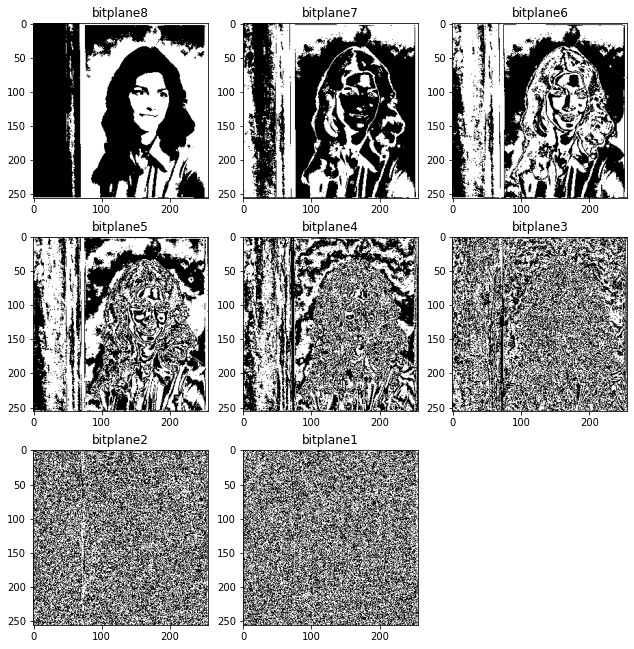

In [15]:
# viewing bitplane images
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.title(titles[i])
    plt.imshow(convert_to_255(bitplane_images[i]), cmap='gray', vmin=0, vmax=255)

plt.subplots_adjust(bottom=0.1, right=1.5, top=2.2)

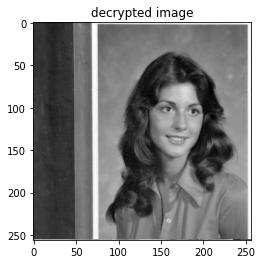

In [17]:
original_image = cipher_image_composition(bitplane_images, height, width)
plt.title('decrypted image')
plt.imshow(original_image, cmap='gray')

# Noise Reduction
----